In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# MLR Assignment: 50 Startups 
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#There is no missing values. No need for EDA.

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Correlation 
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
df=df.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MKT','Profit':'PFT'},axis=1)
df
            

,RD,AD,MKT,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
#R&D Spend and Profits are highly correlated

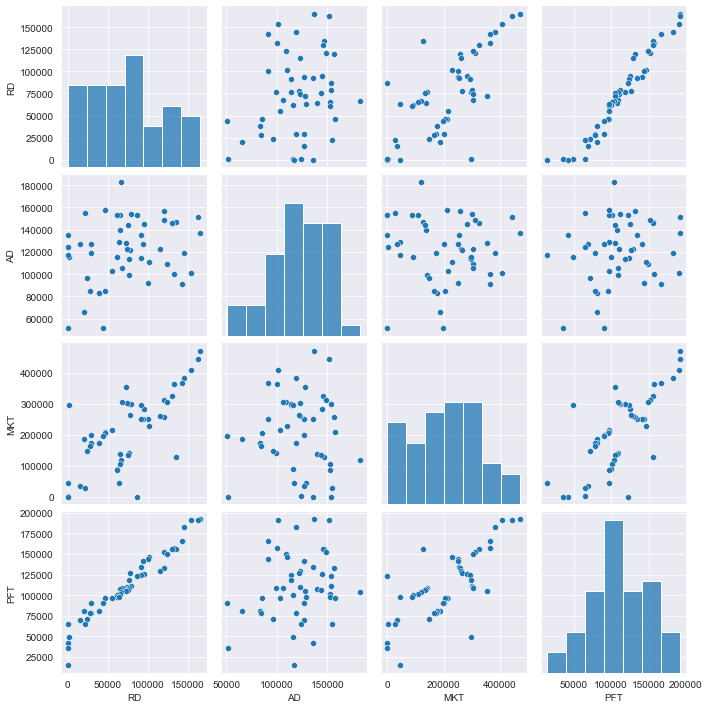

In [10]:
#Scatterplot between variables + histograms
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [11]:
#Building the model

In [12]:
model = smf.ols('PFT~RD+AD+MKT',data=df).fit()

In [13]:
model.rsquared

0.9507459940683246

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        11:44:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKT            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Coefficients
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MKT              0.027228
dtype: float64

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
AD           -0.525507
MKT           1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MKT          1.047168e-01
dtype: float64


In [17]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [18]:
 # Model accuracy is 94.75%

In [19]:
# Build SLR and MLR models for insignificant variables 'AD' and 'MKT'
# Also find their tvalues and pvalues


In [20]:
slr_a=smf.ols("PFT~AD",data=df).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [21]:
slr_a=smf.ols("PFT~MKT",data=df).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    7.808356
 MKT          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKT          4.381073e-10
 dtype: float64)

In [22]:


mlr_am=smf.ols("PFT~AD+MKT",data=df).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues



(Intercept    1.142741
 AD           2.467779
 MKT          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MKT          9.727245e-11
 dtype: float64)

# For Model Validation - 1.Collinearity check and 2. Residual Analysis

In [23]:


# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RD~AD+MKT",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD~RD+MKT",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKT~RD+AD",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MKT'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df



,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MKT,2.326773


In [24]:
# Since none of the variable has Vif >20, therefor certainly no Collinearity hence all variables can be considered in Regression equation

# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

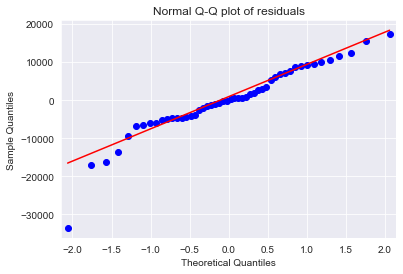

In [25]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [26]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

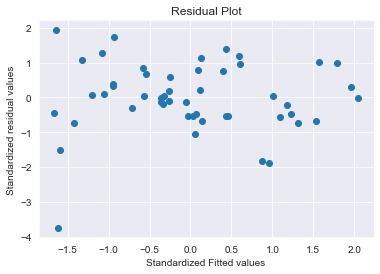

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

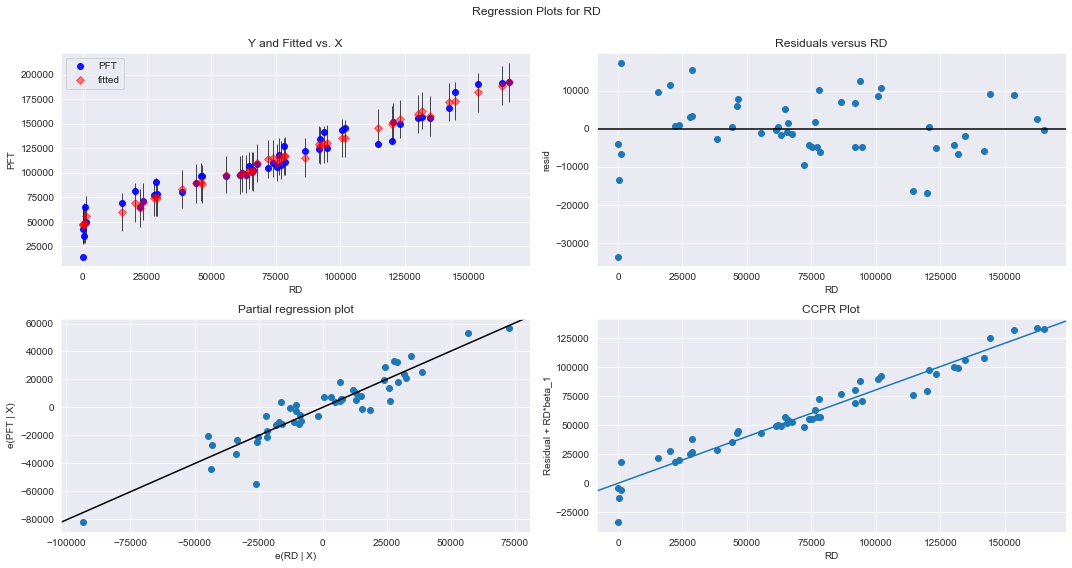

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

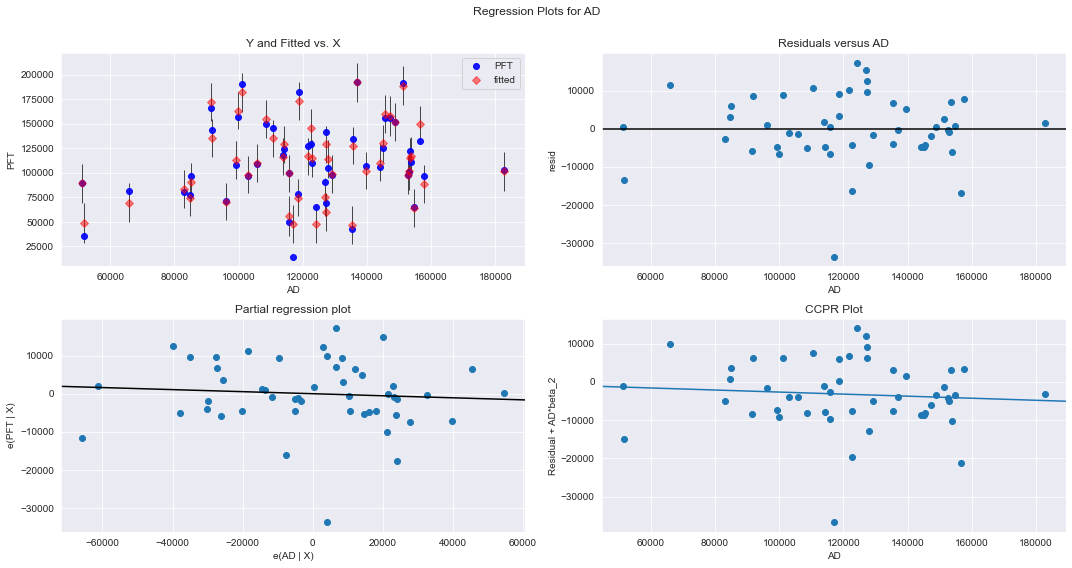

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

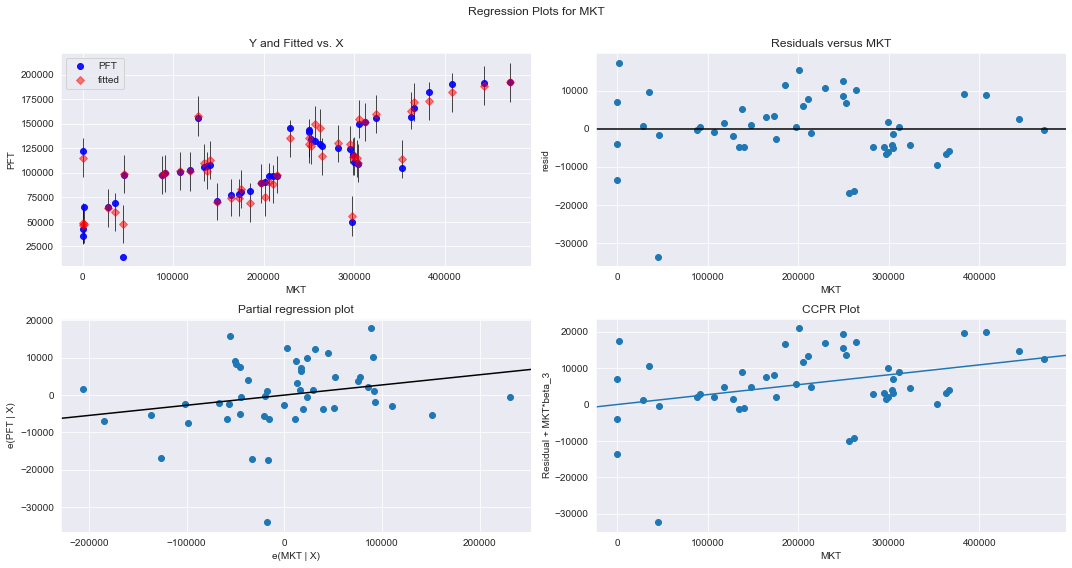

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKT',fig=fig)
plt.show()

## Model Deletion Diagnostics (detecting influencers or outliers)
### Two Techniques :  & 2. Leverage value

### First :Cook's Distance

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

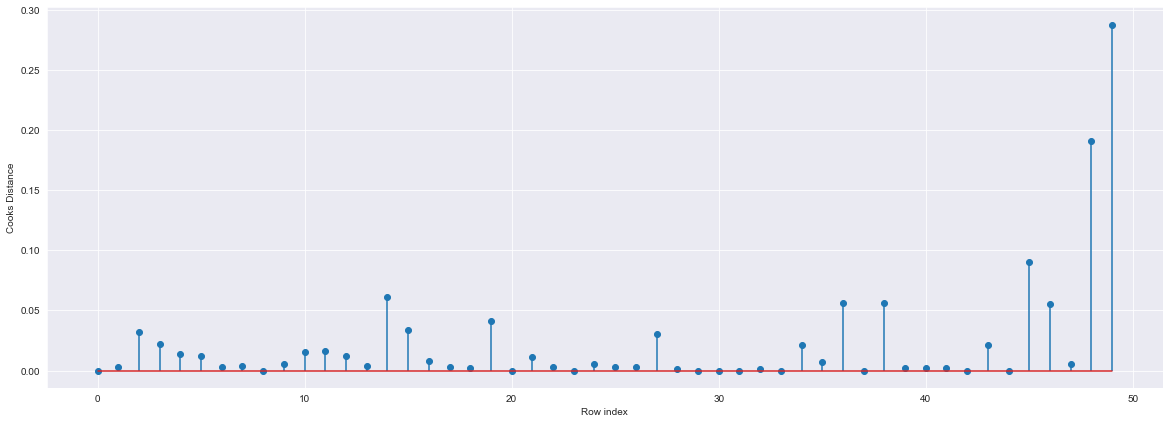

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

### High Influence points

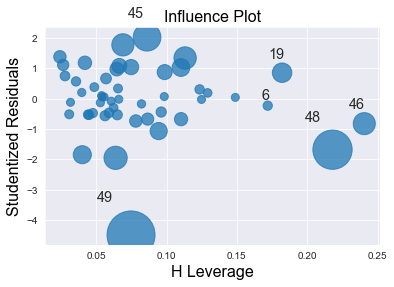

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 48 and 49 are the influencers

In [36]:
df[df.index.isin([48, 49 ])]

,RD,AD,MKT,State,PFT
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Improving the Model

In [37]:
#Discarding the data points which are influencers and reasign the row number (reset_index())
df1=df.drop(df.index[[49,48]],axis=0).reset_index(drop=True)
df1



,RD,AD,MKT,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Deletion Diagnostics and Final Model

In [41]:
final_ml_V= smf.ols('PFT~RD+AD+MKT',data = df1).fit()

In [42]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9626766170294073, 994.6690439260116)

In [43]:
# Model's accurancy has improved to 0.9626 from earlier 0.95

## Predicting for new data

In [45]:
new_data=pd.DataFrame({'RD':75000,"AD":120000,"MKT":220000},index=[0])
new_data

,RD,AD,MKT
0,75000,120000,220000


In [46]:
final_ml_V.predict(new_data)

0    114425.621278
dtype: float64

In [47]:
pred_y = final_ml_V.predict(df1)

In [48]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [49]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.03e-31
Time:                        14:14:47   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
AD            -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKT            0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""